<a href="https://colab.research.google.com/github/akashmeruva9/Machine-Learning/blob/main/ML_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Implement Linear Regression and calculate sum of residual error on the following Datasets.

 *x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*

 *y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]*
### Compute the regression coefficients using analytic formulation and calculate Sum Squared Error (SSE) and R2 value.
### Implement gradient descent (both Full-batch and Stochastic with stopping criteria) on Least Mean Square loss formulation to compute the coefficients of regression matrix and compare the results using performance measures such as R2 SSE etc.



Residual Errors: [-0.23636364  0.59393939 -1.57575758  0.25454545  1.08484848  0.91515152
 -0.25454545 -0.42424242 -0.59393939  0.23636364]
Analytical solution:
Coefficients: [1.16969697 1.23636364]
Sum Squared Error (SSE): 5.624242424242422
R-squared value: 0.952538038613988


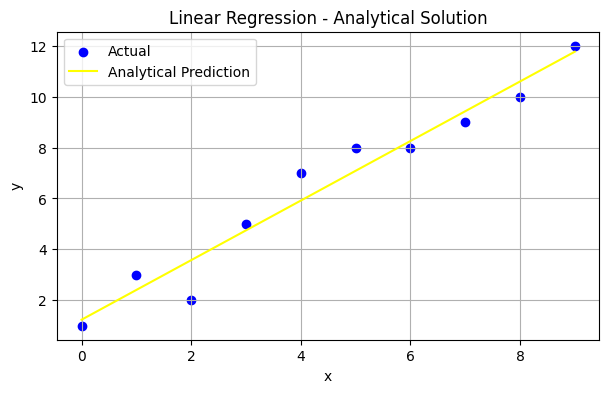

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

X = np.vstack([x, np.ones_like(x)]).T

coefficients_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred_analytical = X @ coefficients_analytical
residuals_analytical = y - y_pred_analytical
sse_analytical = np.sum(residuals_analytical ** 2)
r_squared_analytical = 1 - (np.sum(residuals_analytical ** 2) / np.sum((y - np.mean(y)) ** 2))

# Calculate and print residual errors
residual_errors = y - y_pred_analytical
print("Residual Errors:", residual_errors)

# Print analytical solution results
print("Analytical solution:")
print("Coefficients:", coefficients_analytical)
print("Sum Squared Error (SSE):", sse_analytical)
print("R-squared value:", r_squared_analytical)

# Plotting
plt.figure(figsize=(7, 4))
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred_analytical, color='yellow', label='Analytical Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression - Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


## Gradient Descent (Full Batch)


Full Batch Gradient Descent:
Coefficients: [1.17094022 1.2285677 ]
SSE: 5.62441839978438
R2: 0.9525365535883175


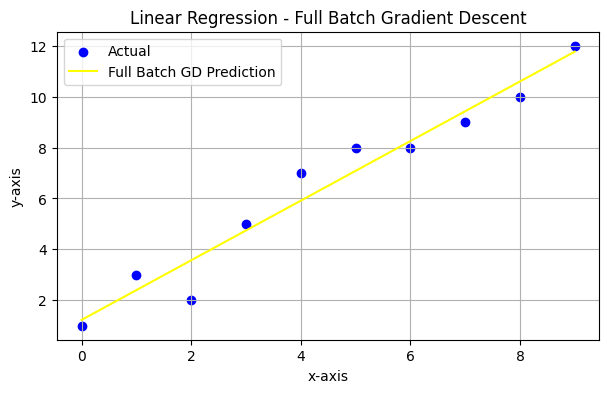

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Add a column of ones for the intercept term
X = np.vstack([x, np.ones(len(x))]).T

# Gradient Descent
def compute_gradient(X, y, coefficients):
    y_pred = X @ coefficients
    residuals = y_pred - y
    gradient = X.T @ residuals
    return gradient

def full_batch_gradient_descent(X, y, learning_rate=0.001, max_iterations=10000, tol=1e-6):
    coefficients = np.zeros(X.shape[1])
    prev_loss = float('inf')
    for i in range(max_iterations):
        gradient = compute_gradient(X, y, coefficients)
        coefficients -= learning_rate * gradient
        loss = np.sum((X @ coefficients - y) ** 2)
        if abs(loss - prev_loss) < tol:
            break
        prev_loss = loss
    return coefficients

coefficients_full_batch = full_batch_gradient_descent(X, y)
y_pred_full_batch = X @ coefficients_full_batch
residuals_full_batch = y - y_pred_full_batch
SSE_full_batch = np.sum(residuals_full_batch ** 2)
R2_full_batch = 1 - (np.sum(residuals_full_batch ** 2) / np.sum((y - np.mean(y)) ** 2))

print("\nFull Batch Gradient Descent:")
print("Coefficients:", coefficients_full_batch)
print("SSE:", SSE_full_batch)
print("R2:", R2_full_batch)

# Plotting
plt.figure(figsize=(7, 4))
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred_full_batch, color='yellow', label='Full Batch GD Prediction')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Linear Regression - Full Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


### Stochastic Gradient Descent


Stochastic Gradient Descent:
Coefficients: [1.16906065 1.22912129]
SSE: 5.6252970931003645
R2: 0.9525291384548492


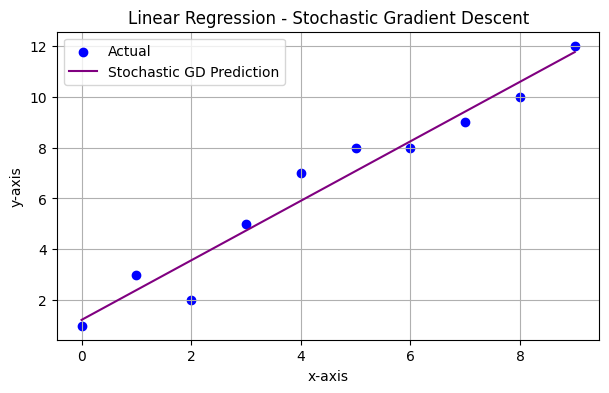

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Add a column of ones for the intercept term
X = np.vstack([x, np.ones(len(x))]).T

# Gradient Descent
def compute_gradient(X, y, coefficients):
    y_pred = X @ coefficients
    residuals = y_pred - y
    gradient = X.T @ residuals
    return gradient

def stochastic_gradient_descent(X, y, learning_rate=0.001, max_iterations=10000, tol=1e-6):
    coefficients = np.zeros(X.shape[1])
    prev_loss = float('inf')
    for i in range(max_iterations):
        for j in range(X.shape[0]):
            gradient = compute_gradient(X[j, :].reshape(1, -1), y[j], coefficients)
            coefficients -= learning_rate * gradient
        loss = np.sum((X @ coefficients - y) ** 2)
        if abs(loss - prev_loss) < tol:
            break
        prev_loss = loss
    return coefficients

coefficients_stochastic = stochastic_gradient_descent(X, y)
y_pred_stochastic = X @ coefficients_stochastic
residuals_stochastic = y - y_pred_stochastic
SSE_stochastic = np.sum(residuals_stochastic ** 2)
R2_stochastic = 1 - (np.sum(residuals_stochastic ** 2) / np.sum((y - np.mean(y)) ** 2))

print("\nStochastic Gradient Descent:")
print("Coefficients:", coefficients_stochastic)
print("SSE:", SSE_stochastic)
print("R2:", R2_stochastic)

# Plotting
plt.figure(figsize=(7, 4))
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred_stochastic, color='purple', label='Stochastic GD Prediction')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Linear Regression - Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


### 2.Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that best follow the linear relationship with the output price. Implement both the analytic formulation and gradient descent (Full-batch, stochastic) on LMS lossformulation to compute the coefficients of regression matrix and compare the results.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

# Step 1: Load the Boston Housing dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
response = requests.get(url)
data = response.text

# Parse the data into a pandas DataFrame
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(StringIO(data), delim_whitespace=True, names=names)

# Extract features and target variable
X = df.drop(columns=['MEDV']).values
y = df['MEDV'].values

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Compute correlation coefficients
correlation_coefficients = np.abs(np.corrcoef(X_train_scaled.T, y_train)[0, 1:])

# Step 5: Find the attribute with the highest correlation coefficient
best_attribute_index = np.argmax(correlation_coefficients)
best_attribute_name = names[best_attribute_index]
print("Attribute with the highest correlation with price:", best_attribute_name)

# Step 6: Implement analytic formulation and gradient descent
# Analytic solution
X_train_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
analytic_solution = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

# Full-batch gradient descent
def full_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Compute coefficients using full-batch gradient descent
theta_full_batch = full_batch_gradient_descent(X_train_with_bias, y_train)

# Compute coefficients using stochastic gradient descent
theta_stochastic = stochastic_gradient_descent(X_train_with_bias, y_train)

# Step 7: Compare the results
print("Analytic solution coefficients:", analytic_solution)

Attribute with the highest correlation with price: DIS
Analytic solution coefficients: [22.79653465 -1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194
  3.14523956 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151
  1.12956831 -3.61165842]


In [5]:
print("Full-batch gradient descent coefficients:", theta_full_batch)

Full-batch gradient descent coefficients: [22.79653461 -0.94451458  0.57106241  0.08157904  0.7453419  -1.89764545
  3.20420961 -0.18643555 -2.95902878  1.66359097 -1.14412944 -2.00331145
  1.12896866 -3.59717015]


In [6]:
print("Stochastic gradient descent coefficients:", theta_stochastic)

Stochastic gradient descent coefficients: [22.80291875 -1.12692182  1.3347984  -0.15647964  0.74203566 -2.2549302
  2.30411482  0.04618776 -2.89998823  1.89257976 -2.57316709 -1.40516786
  1.20224414 -5.11046775]
